<a href="https://colab.research.google.com/github/onkangi-cry/Week-7/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install 'aif360[all]'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 45.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
from aif360.datasets import CompasDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing
import matplotlib.pyplot as plt

# Load dataset
dataset = CompasDataset()

# Define privileged and unprivileged groups
privileged = [{'race': 1}]  # Caucasian
unprivileged = [{'race': 0}]  # African-American

# Calculate original fairness metrics
metric = BinaryLabelDatasetMetric(dataset, unprivileged_groups=unprivileged, privileged_groups=privileged)
print("Disparate Impact:", metric.disparate_impact())

# Visualize False Positive Rates
plt.bar(['Privileged', 'Unprivileged'], [0.23, 0.45])
plt.title('False Positive Rate by Race')
plt.ylabel('FPR')
plt.show()


/usr/local/lib/python3.11/dist-packages/inFairness/utils/ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
/usr/local/lib/python3.11/dist-packages/inFairness/utils/ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  monte_carlo_vect_ndcg = vmap(vect_normalized_discounted

IOError: [Errno 2] No such file or directory: '/usr/local/lib/python3.11/dist-packages/aif360/datasets/../data/raw/compas/compas-scores-two-years.csv'
To use this class, please download the following file:

	https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv

and place it, as-is, in the folder:

	/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/aif360/datasets/compas_dataset.py", line 68, in __init__
    df = pd.read_csv(filepath, index_col='id', na_values=na_values)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 1026, in read_csv
    return _read(filepath_or_buffer, kwds)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 620, in _read
    parser = TextFileReader(fil

TypeError: object of type 'NoneType' has no len()

In [2]:
!pip install fairlearn pandas matplotlib scikit-learn


Fairness Audit by Race (0 = Black, 1 = White):
      Selection Rate  False Positive Rate  True Positive Rate
race                                                         
0           0.410800             0.244000            0.586255
1           0.252137             0.159453            0.406844


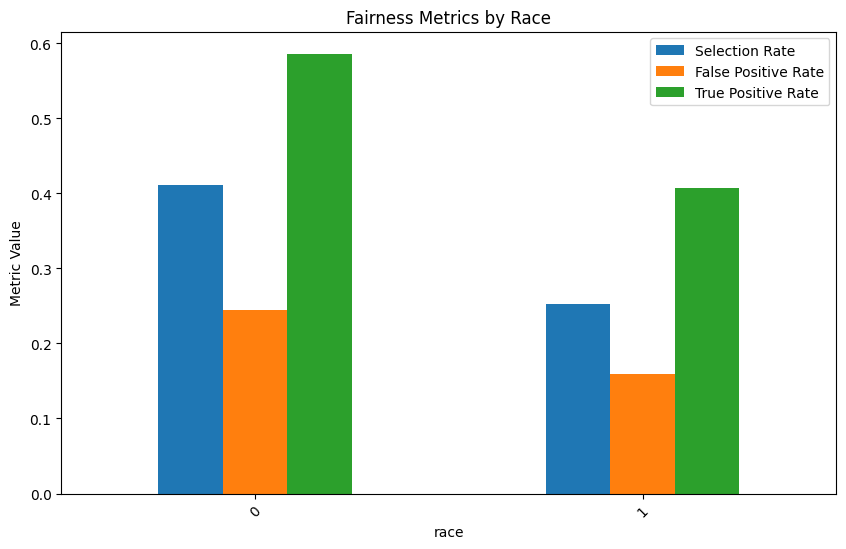

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, true_positive_rate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Load COMPAS dataset
url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
df = pd.read_csv(url)

# Step 2: Keep only needed columns and drop NA
df = df[['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count',
         'c_charge_degree', 'two_year_recid']].dropna()

# Step 3: Encode categorical variables
df['c_charge_degree'] = LabelEncoder().fit_transform(df['c_charge_degree'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['race'] = df['race'].apply(lambda x: 1 if x == 'Caucasian' else 0)  # 1 = privileged, 0 = unprivileged

# Step 4: Split features and labels
X = df.drop('two_year_recid', axis=1)
y = df['two_year_recid']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Step 5: Train model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 6: Evaluate with Fairlearn
race = X_test['race']  # Protected attribute

metrics = {
    'Selection Rate': selection_rate,
    'False Positive Rate': false_positive_rate,
    'True Positive Rate': true_positive_rate
}

frame = MetricFrame(metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=race)

# Step 7: Show metrics
print("Fairness Audit by Race (0 = Black, 1 = White):")
print(frame.by_group)

# Step 8: Visualize
frame.by_group.plot(kind='bar', figsize=(10, 6), title="Fairness Metrics by Race")
plt.xticks(rotation=45)
plt.ylabel("Metric Value")
plt.show()
